# Visualizing data from `censusdata` example

In [10]:
from zipfile import ZipFile
import geopandas as gpd
import pandas as pd
from pathlib import Path
from acs_download import tree

In [2]:
RAW_DATA = Path("../data/raw/")
INTERIM_DATA = Path("../data/interim/")

In [4]:
tree(RAW_DATA)

+ ..\data\raw
    + acs5_2017_medianage_counties.csv
    + acs5_2017_medianage_states.csv
    + cps_00016.dta.gz
    + tl_2018_us_county.zip


In [6]:
ZipFile(RAW_DATA / "tl_2018_us_county.zip").extractall(INTERIM_DATA / "counties/")

In [7]:
tree(INTERIM_DATA)

+ ..\data\interim
    + .ipynb_checkpoints
    + censusdata_example.csv
    + counties
        + tl_2018_us_county.cpg
        + tl_2018_us_county.dbf
        + tl_2018_us_county.prj
        + tl_2018_us_county.shp
        + tl_2018_us_county.shp.ea.iso.xml
        + tl_2018_us_county.shp.iso.xml
        + tl_2018_us_county.shx


In [8]:
geo_data = gpd.read_file(INTERIM_DATA / 'counties' / 'tl_2018_us_county.shp')

geo_data.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477652222,10690952,+41.9158651,-096.7885168,"POLYGON ((-97.019516 42.004097, -97.019519 42...."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680956809,61588406,+46.2946377,-123.4244583,"POLYGON ((-123.436394 46.238197, -123.447592 4..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016819484,29089486,+34.3592729,-104.3686961,"POLYGON ((-104.567387 33.997566, -104.567717 3..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169287528,22832516,+40.7835474,-096.6886584,"POLYGON ((-96.91075099999999 40.784944, -96.91..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645187,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27366699999999 40.089399, -98.27..."


In [11]:
data = pd.read_csv(INTERIM_DATA / 'censusdata_example.csv')

data.head()

,State,State Code,County,County Code,Summary Level,share of bachelors+
0,CA,6,Modoc,49,50,0.165791
1,CA,6,Merced,47,50,0.137588
2,CA,6,Lake,33,50,0.153408
3,CA,6,Mariposa,43,50,0.244215
4,CA,6,Yuba,115,50,0.163754


Geo data GEOID is STATECODE plus COUNTYCODE

we just want GEOID GEOMETRY and maybe NAME for this

In [13]:
california_geodata = geo_data[geo_data['STATEFP'] == '06'].copy()

In [22]:
data['State Code'] = data['State Code'].astype(str).str.zfill(2)
data['County Code'] = data['County Code'].astype(str).str.zfill(3)

In [24]:
data['GEOID'] = data['State Code'] + data['County Code']

data.head()

,State,State Code,County,County Code,Summary Level,share of bachelors+,GEOID
0,CA,06,Modoc,049,50,0.165791,06049
1,CA,06,Merced,047,50,0.137588,06047
2,CA,06,Lake,033,50,0.153408,06033
3,CA,06,Mariposa,043,50,0.244215,06043
4,CA,06,Yuba,115,50,0.163754,06115


In [27]:
vars_im_interested_in = ['GEOID', 'NAME', 'geometry']
cleaned_geodata = california_geodata[vars_im_interested_in].copy()

In [28]:
cleaned_geodata.head()

,GEOID,NAME,geometry
8,06091,Sierra,"POLYGON ((-120.655585 39.69356, -120.655524 39..."
325,06067,Sacramento,"POLYGON ((-121.188571 38.714308, -121.18731 38..."
329,06083,Santa Barbara,"(POLYGON ((-120.734292 34.900689, -120.734302 ..."
346,06009,Calaveras,"POLYGON ((-120.630933 38.3411, -120.630566 38...."
394,06111,Ventura,"(POLYGON ((-119.329216 34.227838, -119.329246 ..."


In [32]:
final_dataset = pd.merge(cleaned_geodata, data)

In [33]:
%matplotlib inline

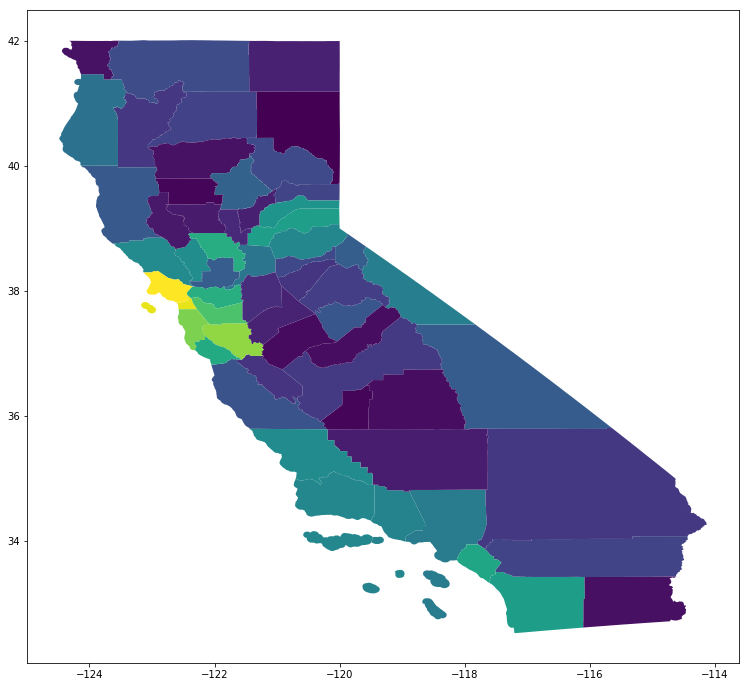

In [37]:
final_dataset.plot(column = 'share of bachelors+', figsize = (16,12));